In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\acer\Downloads\titanic-dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.shape

(891, 12)

In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
df[cat_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [8]:
df.isnull().sum() / df.shape[0] * 100 #finding the percentage of missing values in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# We have to remove those null values before processing or loading into the training a model

In [9]:
df_processed = df.drop(columns=[ 'Name', 'Ticket', 'PassengerId']) #dropping unnecessary columns
df_processed.head() #checking the dataframe after dropping unnecessary columns(basically we're running)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
df_processed.dropna(subset=['Embarked'], inplace=True) #dropping rows with missing 'Embarked' values
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [12]:
df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True) #filling missing values in age column with median
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


C:\Users\acer\AppData\Local\Temp\ipykernel_6460\302689616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True) #filling missing values in age column with median


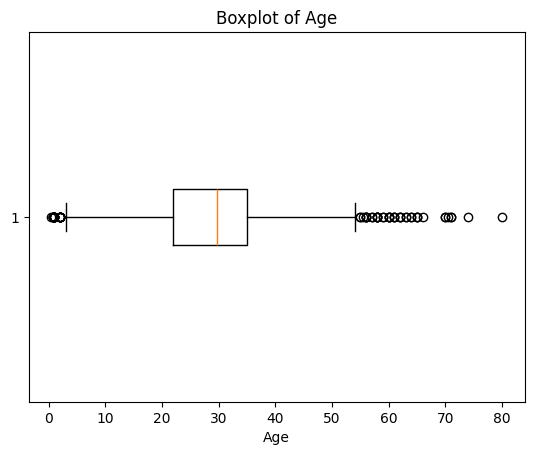

In [13]:
#Detect outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(x=df_processed['Age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [14]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = df_processed[(df_processed['Age'] < lower_bound) | (df_processed['Age'] > upper_bound)]

In [15]:
outliers.shape

(68, 9)

In [16]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]

In [17]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  821 non-null    int64  
 1   Pclass    821 non-null    int64  
 2   Sex       821 non-null    object 
 3   Age       821 non-null    float64
 4   SibSp     821 non-null    int64  
 5   Parch     821 non-null    int64  
 6   Fare      821 non-null    float64
 7   Cabin     175 non-null    object 
 8   Embarked  821 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.1+ KB


In [18]:
df3 = outliers.fillna(df_processed['Age'].mean())
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  821 non-null    int64  
 1   Pclass    821 non-null    int64  
 2   Sex       821 non-null    object 
 3   Age       821 non-null    float64
 4   SibSp     821 non-null    int64  
 5   Parch     821 non-null    int64  
 6   Fare      821 non-null    float64
 7   Cabin     175 non-null    object 
 8   Embarked  821 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.1+ KB


In [20]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 8.978989004171453, Upper Bound: 49.30395961288914


In [21]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]#removing outliers
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  762 non-null    int64  
 1   Pclass    762 non-null    int64  
 2   Sex       762 non-null    object 
 3   Age       762 non-null    float64
 4   SibSp     762 non-null    int64  
 5   Parch     762 non-null    int64  
 6   Fare      762 non-null    float64
 7   Cabin     156 non-null    object 
 8   Embarked  762 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 59.5+ KB


In [22]:
X = df_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_processed['Survived']

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #initializing the scaler
num_cols = [col for col in X.columns if X[col].dtype != 'object'] #selecting numerical columns
X[num_cols] = scaler.fit_transform(X[num_cols]) #scaling numerical columns(we're running the scaler here)
X.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_6460\3545008155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols]) #scaling numerical columns(we're running the scaler here)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.325,0.125,0.0,0.014151,S
1,0.0,female,0.725,0.125,0.0,0.139136,C
2,1.0,female,0.425,0.000,0.0,0.015469,S
3,0.0,female,0.650,0.125,0.0,0.103644,S
4,1.0,male,0.650,0.000,0.0,0.015713,S


In [26]:
X.to_csv('X_processed.csv', index=False) #saving the processed features to a CSV file
y.to_csv('y_processed.csv', index=False) #saving the target variable to a CSV file

# Save the scaler for future use
import joblib #importing joblib(joblib is used to save the model or any object in python)
joblib.dump(scaler, 'scaler.save') #saving the scaler object for future use

['scaler.save']

## Class assignment

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  


In [28]:

diabetics_df = pd.read_csv(r"C:\Users\acer\Downloads\diabetes.csv")
diabetics_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
diabetics_df.info()
diabetics_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [30]:
diabetics_df.duplicated().sum() #finding the number of duplicate rows

np.int64(0)

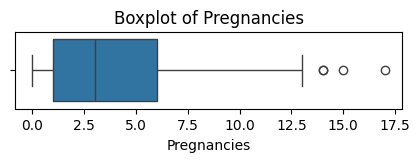

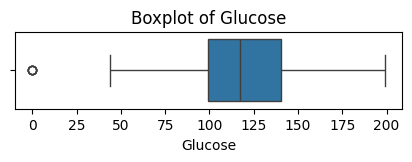

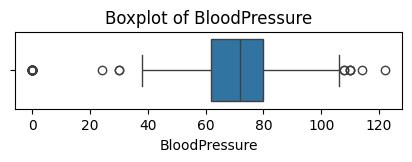

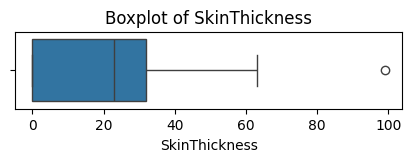

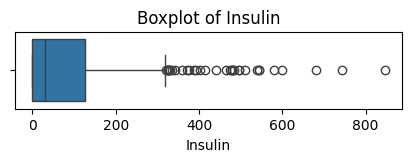

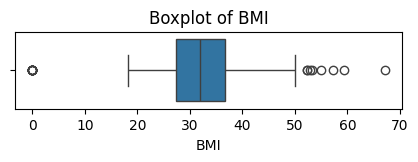

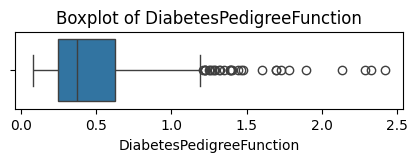

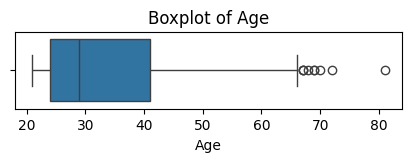

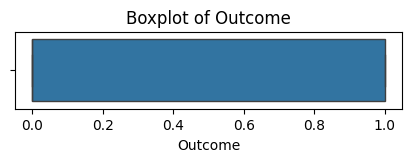

In [42]:
for column in diabetics_df.columns:
    plt.figure(figsize=(5,1),dpi=100)
    sns.boxplot(x=diabetics_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [43]:
# remove outliers using IQR method
# IQR = Q3 - Q1
# Lower Bound = Q1 - 1.5 * IQR
# Upper Bound = Q3 + 1.5 * IQR
import numpy as np
q1, q3 = np.percentile(diabetics_df['Insulin'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_df = diabetics_df[(diabetics_df['Insulin'] >= lower_bound) & (diabetics_df['Insulin'] <= upper_bound)]
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
diabetics_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


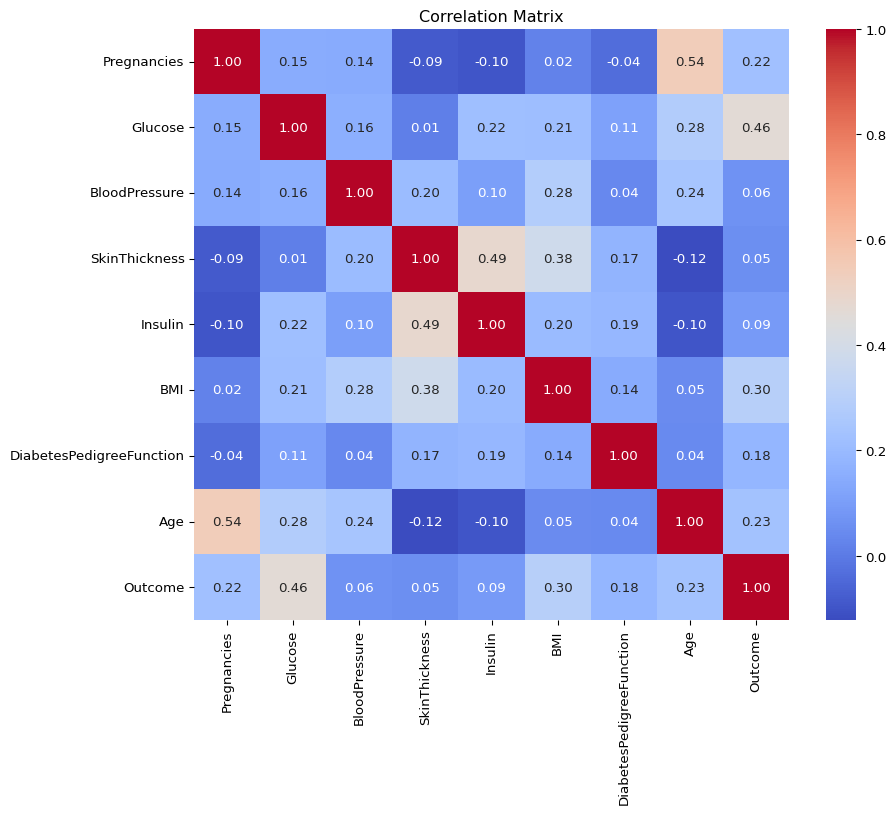

In [45]:
correlation = cleaned_df.corr()
import seaborn as sns
plt.figure(figsize=(10,8),dpi=96)
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [46]:
print(correlation['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.464128
BMI                         0.297225
Age                         0.231023
Pregnancies                 0.223300
DiabetesPedigreeFunction    0.183005
Insulin                     0.088944
BloodPressure               0.064360
SkinThickness               0.054106
Name: Outcome, dtype: float64


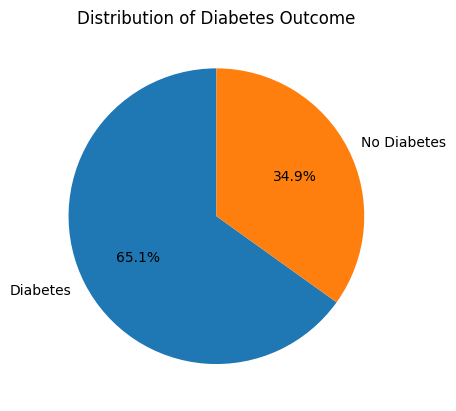

In [48]:
plt.pie(diabetics_df['Outcome'].value_counts(), labels=['Diabetes', 'No Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [49]:
X = cleaned_df.drop(columns=['Outcome'])
y = cleaned_df['Outcome']

In [51]:
scaler = MinMaxScaler() #initializing the scaler
X_normalize = scaler.fit_transform(X) #scaling the features


In [52]:
X_normalize

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]], shape=(734, 8))